In [2]:
# importing portfolio
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas_datareader.data as pdr
import yfinance

yfinance.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [3]:
df_carteira = pd.read_excel("Carteira.xlsx")
display(df_carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,100
3,BBDC4,Ação,100
4,ITUB4,Ação,300
5,ENEV3,Ação,100
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


In [4]:
data_inicial = datetime.now() - timedelta(days=360)
data_final = datetime.now()

lista_ativos = list(df_carteira["Ativos"].astype(str) + ".SA")

df_cotacoes = pdr.get_data_yahoo(lista_ativos, data_inicial, data_final)["Adj Close"]
display(df_cotacoes)

[*********************100%%**********************]  13 of 13 completed


Ticker,BBDC4.SA,BCRI11.SA,BOVA11.SA,BPAC11.SA,ENEV3.SA,ITUB4.SA,KNRI11.SA,MGLU3.SA,MOVI3.SA,NTCO3.SA,SMAL11.SA,VILG11.SA,XPLG11.SA
Date,,,,,,,,,,,,,
2023-06-26,15.606793,69.082527,114.419998,29.407410,11.99,26.856411,145.416916,31.800993,10.64,16.828640,108.250000,97.034218,104.393112
2023-06-27,15.661227,70.177681,113.769997,29.221720,11.75,26.556234,145.889359,31.613928,10.40,16.655842,106.300003,97.413483,105.026253
2023-06-28,15.402918,70.327820,113.029999,29.319448,11.82,26.406147,147.297485,31.333330,10.00,16.118248,106.349998,97.496735,105.268318
2023-06-29,15.469887,70.460289,114.910004,30.247902,11.99,26.725084,148.965012,32.268654,10.37,16.156645,108.800003,99.208015,105.584892
2023-06-30,15.737764,70.460289,114.169998,30.736557,12.27,26.659422,148.010803,31.520395,10.53,16.070248,109.500000,102.676819,106.320465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-13,12.700000,66.599998,116.180000,31.879999,12.43,31.170000,156.089996,11.220000,5.96,14.890000,93.449997,82.300003,101.550003
2024-06-14,12.830000,66.540001,116.220001,31.900000,12.50,31.139999,155.649994,11.440000,6.03,14.800000,93.370003,82.000000,102.669998
2024-06-17,12.970000,66.220001,115.739998,31.670000,12.32,31.900000,154.050003,10.990000,5.84,14.540000,93.000000,82.150002,102.540001


In [5]:
#adjusting data

df_cotacoes = df_cotacoes.ffill()
print(df_cotacoes.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2023-06-26 to 2024-06-19
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BBDC4.SA   246 non-null    float64
 1   BCRI11.SA  246 non-null    float64
 2   BOVA11.SA  246 non-null    float64
 3   BPAC11.SA  246 non-null    float64
 4   ENEV3.SA   246 non-null    float64
 5   ITUB4.SA   246 non-null    float64
 6   KNRI11.SA  246 non-null    float64
 7   MGLU3.SA   246 non-null    float64
 8   MOVI3.SA   246 non-null    float64
 9   NTCO3.SA   246 non-null    float64
 10  SMAL11.SA  246 non-null    float64
 11  VILG11.SA  246 non-null    float64
 12  XPLG11.SA  246 non-null    float64
dtypes: float64(13)
memory usage: 26.9 KB
None


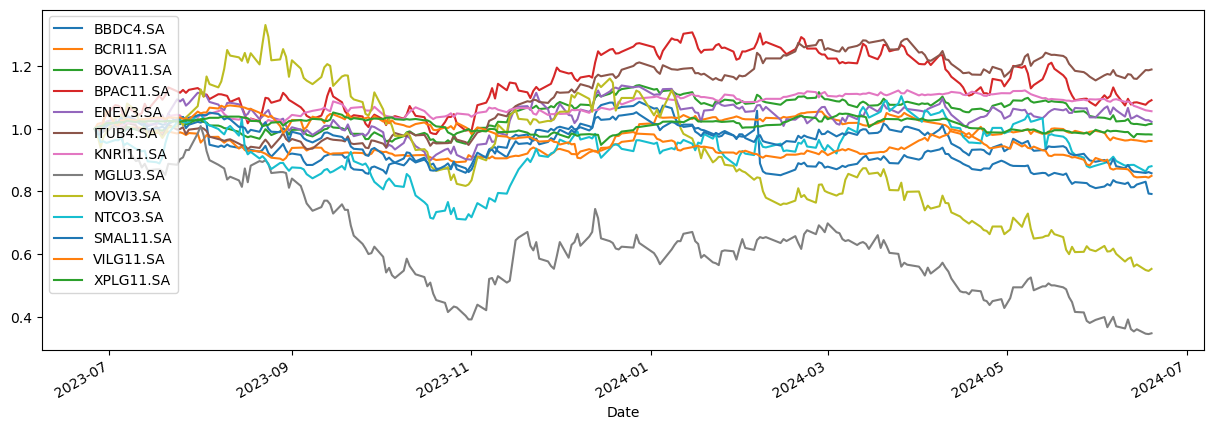

In [6]:
#normalizing
df_cotacoes_norm = df_cotacoes / df_cotacoes.iloc[0]
df_cotacoes_norm.plot(figsize=(15,5))
plt.legend(loc="upper left")
plt.show()

In [8]:
#bringing IBOV datba
df_ibov = pdr.get_data_yahoo("^BVSP", data_inicial, data_final)["Adj Close"]
display(df_ibov)

[*********************100%%**********************]  1 of 1 completed


Date
2023-06-26    118243.000000
2023-06-27    117523.000000
2023-06-28    116681.000000
2023-06-29    118383.000000
2023-06-30    118087.000000
                  ...      
2024-06-13    119568.000000
2024-06-14    119662.000000
2024-06-17    119138.000000
2024-06-18    119630.000000
2024-06-19    119739.882812
Name: Adj Close, Length: 246, dtype: float64

In [13]:
df_valor_investido = pd.DataFrame()

for ativo in df_carteira["Ativos"]:
    qtde_acoes = df_carteira.loc[df_carteira["Ativos"]==ativo,"Qtde"].values[0]
    df_valor_investido[ativo] = qtde_acoes * df_cotacoes[f"{ativo}.SA"]
    
df_valor_investido["Total"] = df_valor_investido.sum(axis=1)
display(df_valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11,Total
Date,,,,,,,,,,,,,,
2023-06-26,11441.999817,10825.000000,3180.099297,1560.679340,8056.923294,1198.999977,1064.000034,2940.740967,1682.863998,6908.252716,9703.421783,14541.691589,10439.311218,83543.984032
2023-06-27,11376.999664,10630.000305,3161.392784,1566.122723,7966.870308,1175.000000,1039.999962,2922.171974,1665.584183,7017.768097,9741.348267,14588.935852,10502.625275,83354.819393
2023-06-28,11302.999878,10634.999847,3133.333015,1540.291786,7921.844101,1181.999969,1000.000000,2931.944847,1611.824799,7032.781982,9749.673462,14729.748535,10526.831818,83298.274040
2023-06-29,11491.000366,10880.000305,3226.865387,1546.988678,8017.525291,1198.999977,1036.999989,3024.790192,1615.664482,7046.028900,9920.801544,14896.501160,10558.489227,84460.655499
2023-06-30,11416.999817,10950.000000,3152.039528,1573.776436,7997.826576,1227.000046,1052.999973,3073.655701,1607.024765,7046.028900,10267.681885,14801.080322,10632.046509,84798.160458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-13,11618.000031,9344.999695,1122.000027,1269.999981,9351.000023,1243.000031,596.000004,3187.999916,1489.000034,6659.999847,8230.000305,15608.999634,10155.000305,79875.999832
2024-06-14,11622.000122,9337.000275,1143.999958,1282.999992,9341.999817,1250.000000,603.000021,3189.999962,1480.000019,6654.000092,8200.000000,15564.999390,10266.999817,79936.999464
2024-06-17,11573.999786,9300.000000,1098.999977,1297.000027,9569.999886,1231.999969,584.000015,3167.000008,1453.999996,6622.000122,8215.000153,15405.000305,10254.000092,79773.000336


Date
2023-06-26    1.000000
2023-06-27    0.993911
2023-06-28    0.986790
2023-06-29    1.001184
2023-06-30    0.998681
                ...   
2024-06-13    1.011206
2024-06-14    1.012001
2024-06-17    1.007569
2024-06-18    1.011730
2024-06-19    1.012659
Name: Adj Close, Length: 246, dtype: float64

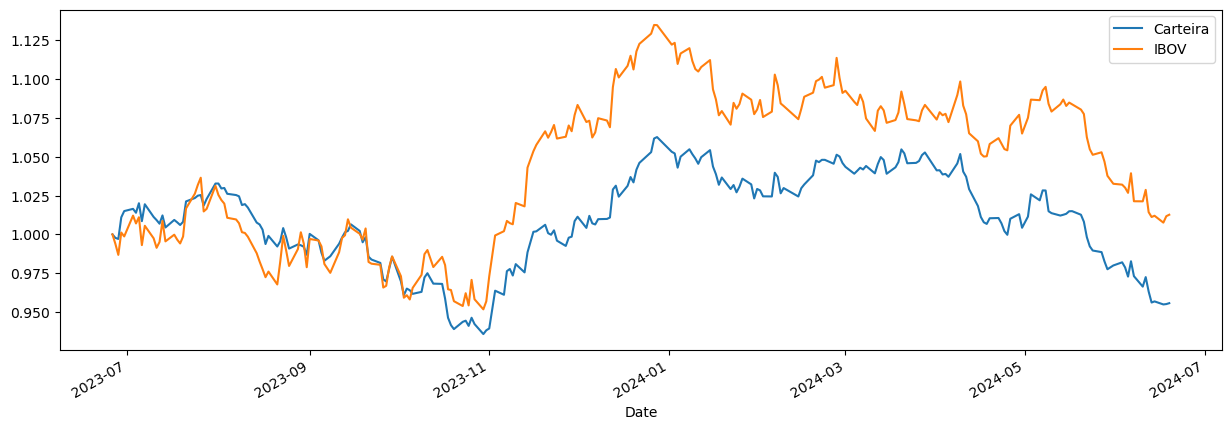

In [17]:
df_ibov_norm = df_ibov / df_ibov.iloc[0]
df_valor_investido_norm = df_valor_investido / df_valor_investido.iloc[0]

df_valor_investido_norm["Total"].plot(label="Carteira", figsize=(15,5))
df_ibov_norm.plot(label="IBOV")
plt.legend()
display(df_ibov_norm)

In [21]:
#return
retorno_ibov = df_ibov_norm[-1] - 1
retorno_carteira = df_valor_investido_norm["Total"][-1] - 1
print(f"Retorno IBOV: {retorno_ibov:.1%}")
print(f"Retorno Carteira: {retorno_carteira:.1%}")

Retorno IBOV: 1.3%
Retorno Carteira: -4.4%


In [22]:
#correlation
print(df_valor_investido["Total"].corr(df_ibov))


0.7986261312136169
